In [68]:
#这里的代码是使用lightgbm 对预测dt的特征做特征重要性排序。

import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.cross_validation import train_test_split


pd.options.mode.chained_assignment = None  # default='warn'


train_list = ['180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
          '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
          '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
          '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
          '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021',\
           '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029','181101',\
             '181030','181031', '181102', '181103', '181104']

valid_list = ['181030','181031', '181101','181102', '181103', '181104']

#valid_list = ['181022', '181023', '181024', '181025', '181026', '181027','181028']
#valid_list = ['181030', '181103', '181104']

pred_list = ['181105', '181106', '181107', '181108', '181109','181110', '181111']

# test_list = ['180709', '180710', '180711', '180712', '180713', '180714', '180715']

# d_list= ['180602', '180603', '180604', '180605', '180606', '180607', '180608', '180609', '180610',\
#           '180611', '180612', '180613', '180614', '180615', '180616', '180617', '180618', '180619', '180620',\
#           '180621', '180622', '180623', '180624', '180625', '180626', '180627', '180628', '180629', '180630',\
#           '180701', '180702', '180703', '180704', '180705', '180706', '180707', '180708', '180709', '180710', \
#           '180711', '180712', '180713', '180714', '180715',\
#          '180716', '180717', '180718', '180719', '180720', '180721', '180722', '180723', '180724', '180725', \
#           '180726', '180727', '180728', '180729', '180730', '180731', '180801', '180802', '180803', '180804', \
#           '180805', '180806', '180807', '180808', '180809', '180810', '180811', '180812', '180813', '180814',\
#           '180815', '180816', '180817', '180818', '180819', '180820', '180821', '180822',\
#           '180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
#           '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
#           '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
#           '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
#           '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
#           '181016', '181017', '181018', '181019', '181020', '181021']


day_all = ['180531','180602', '180603', '180604', '180605', '180606', '180607', '180608', '180609', '180610',\
           '180611', '180612', '180613', '180614', '180615', '180616', '180617', '180618', '180619', '180620',\
           '180621', '180622', '180623', '180624', '180625', '180626', '180627', '180628', '180629', '180630',\
           '180701', '180702', '180703', '180704', '180705', '180706', '180707', '180708', '180709', '180710', \
           '180711', '180712', '180713', '180714', '180715',\
           '180716', '180717', '180718', '180719', '180720', '180721', '180722', '180723', '180724', '180725',\
           '180726', '180727', '180728', '180729', '180730', '180731', '180801', '180802', '180803', '180804',\
           '180805', '180806', '180807', '180808', '180809', '180810', '180811', '180812', '180813', '180814',\
           '180815', '180816', '180817', '180818', '180819', '180820', '180821', '180822', \
            '180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
           '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
           '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
            '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
           '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021','181022',\
            '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029', '181030', \
           '181031', '181101', '181102', '181103', '181104', '181105', '181106', '181107', '181108', '181109',\
           '181110', '181111']

In [24]:
#定义截取函数
def over_data_do(s):
    if s<0:
        return 0
    elif s> 2880:
        return 2880
    else:
        return s

In [4]:
day = '180918'
#限定指定的列 
#file = pd.read_csv('demo.csv',usecols=['column1', 'column2', 'column3'])
print(day_all_data[day_all_data.end_time.isnull()].shape)



(5000, 519)
(0, 519)
180918 

In [69]:

# 划分训练集， 验证集 测试集
str_cols = ['order_id','job_name',\
            'start_time','end_time',\
            'day_0_bef_end_time']
features_all = list(pd.read_csv('final_edt_feature_score.csv')['feature'][:200])
#read_cols = list(set(str_cols+features_all))
read_cols = list(set(str_cols+list(features_all_merge)))


train_df = []
n_i = 1  #选取第几轮数据切片
for day in train_list:
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=6000,usecols=read_cols)

    #day_all_data = day_all_data[day_all_data.end_time.notnull()]

    #过滤结束日期超过2天的
    #print(day_all_data.shape)
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]

    train_df.append(day_all_data)
    print(day,end=' ') 
    
train = pd.concat(train_df, ignore_index=True)


valid_df = []
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=20000,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    valid_df.append(day_all_data)
    
valid = pd.concat(valid_df, ignore_index=True)
train['his_evet_count_null'] = train['all_count'].apply(lambda x:x is None).apply(int)
valid['his_evet_count_null'] = valid['all_count'].apply(lambda x:x is None).apply(int)
train.fillna(0,inplace=True)
valid.fillna(0,inplace=True)

print('\n')
print(train.shape)
print(valid.shape)

180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 181011 181012 181013 181014 181015 181016 181017 181018 181019 181020 181021 181022 181023 181024 181025 181026 181027 181028 181029 181101 181030 181031 181102 181103 181104 181030 181031 181101 181102 181103 181104 

(406823, 144)
(117526, 144)


In [42]:
pd.concat([train,valid],ignore_index=True).to_csv('train_and_vlid_small.csv')

In [9]:
valid_list = ['181030', '181103', '181104']
valid_df = []
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=20000,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    valid_df.append(day_all_data)
valid = pd.concat(valid_df, ignore_index=True)

valid['his_evet_count_null'] = valid['all_count'].apply(lambda x:x is None).apply(int)
valid.fillna(0,inplace=True)

print('\n')
print(valid.shape)

181030 181103 181104 

(58810, 206)


In [5]:
train['his_evet_count_null'] = train['all_count'].apply(lambda x:x is None).apply(int)
valid['his_evet_count_null'] = valid['all_count'].apply(lambda x:x is None).apply(int)
train.fillna(0,inplace=True)
valid.fillna(0,inplace=True)

print('\n')
print(train.shape)
print(valid.shape)



(185802, 519)
(58749, 519)


In [3]:

 #选取第几轮数据切片
for n_i in range(1,20):
    train_df = []
    print(n_i)
    for day in train_list:
        print(day,end=' ')   
        day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\train_%s_edt.csv'%day)

        #day_all_data = day_all_data[day_all_data.end_time.notnull()]

        #过滤结束日期超过2天的
        day_after_2 = day_all[day_all.index(day)+1]
        day_after_2_int = int('20'+day_after_2+'235959')
        day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
        day_all_data = day_all_data[day_all_data.end_time.notnull()]

        round_len = day_all_data.shape[0]//20
        train_df.append(day_all_data[n_i*round_len:(n_i+1)*round_len])

    train = pd.concat(train_df, ignore_index=True)

    train.to_csv('./data_edt_train/edt_split_%d.csv'%n_i,index=False)

1
180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 181011 181012 181013 181014 181015 2
180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 181011 181012 181013 181014 181015 3
180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 

In [4]:
# 和下面的代码功能同

n_i = 3
train = pd.read_csv('./data_edt_train/edt_split_%d.csv'%n_i)

valid_df = []
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\train_%s_edt.csv'%day)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    valid_df.append(day_all_data.sample(frac=0.2))
    
valid = pd.concat(valid_df, ignore_index=True)

print(train.shape)
print(valid.shape)

181016 181017 181018 181019 181020 181021 (357701, 215)
(166703, 215)


In [4]:
#读取数据 按天

# 划分训练集， 验证集 测试集

train_df = []
n_i = 1  #选取第几轮数据切片
for day in train_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\train_%s_edt.csv'%day)
    
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    
    #过滤结束日期超过2天的
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    day_all_data = day_all_data[day_all_data.end_time.notnull()]
    
    round_len = day_all_data.shape[0]//14
    train_df.append(day_all_data[n_i*round_len:(n_i+1)*round_len])
    
train = pd.concat(train_df, ignore_index=True)

train.to_csv('./data_edt_train/edt_split_%d.csv'%n_i,index=False)

valid_df = []
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\train_%s_edt.csv'%day)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    valid_df.append(day_all_data.sample(frac=0.2))
    
valid = pd.concat(valid_df, ignore_index=True)

# test_df = []

# for day in test_list:
#     print(day,end=' ')   
#     day_all_data = pd.read_csv(r'E:\jupyter\CTM\valid_data\train/train_%s_edt.csv'%day)
#     day_all_data = day_all_data[day_all_data.end_time.notnull()]
#     test_df.append(day_all_data)
    
# test = pd.concat(test_df, ignore_index=True)

#空值处理

180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 181011 181012 181013 181014 181015 181016 181017 181018 181019 181020 181021 

IndexError: list index out of range

In [70]:

#过滤训练不需要的数据字段
del_cols = ['day_7_bef_start_time'\
        ,'day_7_bef_end_time'\
        ,'day_8_bef_start_time'\
        ,'day_8_bef_end_time'\
        ,'day_9_bef_start_time'\
        ,'day_9_bef_end_time'\
        ,'day_10_bef_start_time'\
        ,'day_10_bef_end_time'\
        ,'day_11_bef_start_time'\
        ,'day_11_bef_end_time'\
        ,'day_12_bef_start_time'\
        ,'day_12_bef_end_time'\
        ,'day_13_bef_start_time'\
        ,'day_13_bef_end_time'\
        ,'day_14_bef_start_time'\
        ,'day_14_bef_end_time']
cols_train =[clm for clm in valid.columns if clm not in ['order_id','job_name','v_date','order_d','from_time_1000_start',\
                                                            'start_time','end_time','order_id','job_name','day_0_bef_start_time',\
                                                            'day_0_bef_end_time','day_bef_0_dt']]
cols_train = [cl for cl in cols_train if cl not in del_cols]

valid_x = valid[cols_train]
valid_y = valid['day_0_bef_end_time']

train_x,test_x,train_y,test_y = train_test_split(train[cols_train],train['day_0_bef_end_time'],random_state=33,test_size=0.1)

# train_y = train_y.fillna(train_y.mean())
# valid_y = valid_y.fillna(valid_y.mean())
# test_y = test_y.fillna(test_y.mean())  

print(train_x.shape)
print(test_x.shape)
print(valid_x.shape)

(366140, 123)
(40683, 123)
(117526, 123)


In [7]:
train.head(2)

,order_id,job_name,avg_runtime,start_time,end_time,cyclic,avg_start_time,v_date,order_d,from_time_1000_start,...,new_value_8,new_value_32,new_value_2048,old_value_1,old_value_2,old_value_4,old_value_8,old_value_32,old_value_2048,his_evet_count_null
0,0pgzu1,TN_ARMA_1_ZBXX_LV21_BID_HIT_INF_PRM,0.167,2.018083e+13,2.018083e+13,0,48.683,180828,180828,0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,2k3jq2,ARTS_P_ARTS_S_RTS_EVL_TGT_RSL_DTL_SR_POS_SWG_CNT,2.350,2.018083e+13,2.018083e+13,0,858.833,180828,180828,0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0


In [72]:
# lightgbm 算法预测
import json
import lightgbm as lgb



y_train = train_y.values
y_test = test_y.values

X_train = train_x.values
X_test = test_x.values

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train,silent=True)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
params = {'task': 'train',
   'boosting_type': 'gbdt',
   'objective': 'regression',
   'metric':  'mse',
   'num_leaves': 2**6,
   'learning_rate': 0.1,
   'feature_fraction': 0.8,
   'bagging_fraction': 0.8,
   'bagging_freq': 5,
   'verbose': 50,
    'verbose_eval':50}
  
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=False)

# print('Save model...')

# # save model to file
# from sklearn.externals import joblib
# joblib.dump(gbm,'edt_gbm.pkl')
# clf = joblib.load("edt_gbm.pkl")

# gbm.save_model('lightgbm_model_edt.txt')
print('Start predicting...')


# predict

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
#clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# eval print(y_pred)
print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
# print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))


Start training...
Start predicting...
The MAE of prediction train_data is: 82.1617082385
The MAE of prediction valid_data is: 95.7353867984
The MSE of prediction train_data is: 22373.4236757
The MSE of prediction valid_data is: 32524.9042135


In [56]:
#线性模型预测
from sklearn.linear_model import LinearRegression


#X_train = ss_X.fit_transform(X_train)
#X_test = ss_X.transform(X_test)

#test_x = ss_X.transform(test_x)

#y_train = ss_y.fit_transform(y_train)
#y_test = ss_y.transform(y_test)

lr = LinearRegression()

lr.fit(X_train,y_train)


lr_y_predict = lr.predict(X_test)
vld_y_predict = lr.predict(valid_x)


print('LR')
print(mean_absolute_error(y_test,lr_y_predict))
print(mean_absolute_error(valid_y,vld_y_predict))

LR
144.814904069
137.825219314


In [48]:
#按天预测 valid天中的每天数据
valid_list = ['181029','181030','181031', '181101', '181102', '181103', '181104']
for day in valid_list:
    print(day)
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
    day_all_data.fillna(0,inplace=True)

    valid_x = day_all_data[cols_train]
    valid_y = day_all_data['day_0_bef_end_time']

    
    vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
    print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))
    

181029
The MAE of prediction valid_data is: 57.4728002281
The MSE of prediction valid_data is: 9553.00592037
181030
The MAE of prediction valid_data is: 59.1442433904
The MSE of prediction valid_data is: 10732.6708201
181031
The MAE of prediction valid_data is: 246.324939895
The MSE of prediction valid_data is: 130185.068059
181101
The MAE of prediction valid_data is: 132.212688739
The MSE of prediction valid_data is: 57759.4428795
181102
The MAE of prediction valid_data is: 96.5282237839
The MSE of prediction valid_data is: 22834.7531944
181103
The MAE of prediction valid_data is: 294.137520674
The MSE of prediction valid_data is: 147138.984338
181104
The MAE of prediction valid_data is: 65.03182653
The MSE of prediction valid_data is: 12193.9522505


In [49]:
valid_list = ['181031', '181101', '181103']
for day in valid_list:
    print(day)
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    day_all_data.index = range(len(day_all_data))
    
    day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
    day_all_data.fillna(0,inplace=True)

    valid_x = day_all_data[cols_train]
    valid_y = day_all_data['day_0_bef_end_time']

    
    vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    
    day_all_data['pred_edt'] = vlid_pred
    day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
    day_all_data.to_csv('see_error_%s.csv'%day,index=False)
    print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
    print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))

181031
The MAE of prediction valid_data is: 246.324939895
The MSE of prediction valid_data is: 130185.068059
181101
The MAE of prediction valid_data is: 132.212688739
The MSE of prediction valid_data is: 57759.4428795
181103
The MAE of prediction valid_data is: 294.137520674
The MSE of prediction valid_data is: 147138.984338


In [63]:
#查看 end_time 和day_1_7_bef_end_time_median  day_1_7_bef_end_time_mean day_1_14_bef_end_time_mean
valid_list =[ '181030','181031','181101',  '181102', '181103', '181104']
for day in pred_list[:-1]:
    print(day)
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    
#     day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
#     day_all_data.fillna(0,inplace=True)

#     valid_x = day_all_data[cols_train]
#     valid_y = day_all_data['day_0_bef_end_time']

    
#     vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    
#     day_all_data['pred_edt'] = vlid_pred
#     day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
#     day_all_data.to_csv('see_error_%s.csv'%day,index=False)
    print('The MAE of valid_data is:', mean_absolute_error(day_all_data['day_0_bef_end_time'], day_all_data['day_1_14_bef_end_time_median']))
    #print('The MSE of prediction valid_data is:', mean_absolute_error()
    
#     print('The MAE of prediction valid_data is:', mean_absolute_error(day_all_data[], vlid_pred))
    print('The MSE of  valid_data is:', mean_squared_error(day_all_data['day_0_bef_end_time'],day_all_data['day_1_14_bef_end_time_median']))

181105
The MAE of valid_data is: 85.4207841518
The MSE of  valid_data is: 24633.3498545
181106
The MAE of valid_data is: 69.1378617579
The MSE of  valid_data is: 22298.2060051
181107
The MAE of valid_data is: 72.1018115639
The MSE of  valid_data is: 25652.9258395
181108
The MAE of valid_data is: 69.216926435
The MSE of  valid_data is: 30018.1403516
181109
The MAE of valid_data is: 80.0609572766
The MSE of  valid_data is: 42798.0499006
181110
The MAE of valid_data is: 94.1001232998
The MSE of  valid_data is: 69425.3946268


In [ ]:
1-7
181030
The MAE of valid_data is: 86.8107743054
The MSE of  valid_data is: 44981.405926
181031
The MAE of valid_data is: 113.817885865
The MSE of  valid_data is: 82376.3423674
181101
The MAE of valid_data is: 253.651701771
The MSE of  valid_data is: 237982.126631
181102
The MAE of valid_data is: 131.491314005
The MSE of  valid_data is: 56976.4506849
181103
The MAE of valid_data is: 342.414843047
The MSE of  valid_data is: 250496.523571
181104
The MAE of valid_data is: 90.2959802026
The MSE of  valid_data is: 30625.1348387

In [73]:
#预测集：pred_list

for day in pred_list[:-1]:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'035959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    day_all_data.index = range(len(day_all_data))
    
    day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
    day_all_data.fillna(0,inplace=True)

    valid_x = day_all_data[cols_train]
    valid_y = day_all_data['day_0_bef_end_time']
    
    vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    
#    day_all_data['pred_edt'] = vlid_pred
#    day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
    
    print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
    print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))
    

181105 (99014, 143)
The MAE of prediction valid_data is: 66.2786799992
The MSE of prediction valid_data is: 21003.5571168
181106 (93076, 143)
The MAE of prediction valid_data is: 54.7259603535
The MSE of prediction valid_data is: 23434.8323351
181107 (71365, 143)
The MAE of prediction valid_data is: 62.1254548714
The MSE of prediction valid_data is: 28951.0274034
181108 (58253, 143)
The MAE of prediction valid_data is: 68.4952090267
The MSE of prediction valid_data is: 43370.4832487
181109 (40950, 143)
The MAE of prediction valid_data is: 108.790686982
The MSE of prediction valid_data is: 87444.8323285
181110 (25940, 143)
The MAE of prediction valid_data is: 136.811269054
The MSE of prediction valid_data is: 129021.938635


In [ ]:
#
181105 (99292, 143)
The MAE of prediction valid_data is: 66.7129386085
The MSE of prediction valid_data is: 16992.64053
181106 (93329, 143)
The MAE of prediction valid_data is: 54.0315843217
The MSE of prediction valid_data is: 17384.9730788
181107 (71706, 143)
The MAE of prediction valid_data is: 60.9692034039
The MSE of prediction valid_data is: 22914.449133
181108 (58642, 143)
The MAE of prediction valid_data is: 65.8937136802
The MSE of prediction valid_data is: 33349.8660259
181109 (41242, 143)
The MAE of prediction valid_data is: 108.114761813
The MSE of prediction valid_data is: 67294.0871929
181110 (25953, 143)
The MAE of prediction valid_data is: 115.804370012
The MSE of prediction valid_data is: 87382.8578628

In [ ]:
181022
The MAE of prediction valid_data is: 56.7984581388
The MSE of prediction valid_data is: 8193.15746027
181023
The MAE of prediction valid_data is: 95.3118105083
The MSE of prediction valid_data is: 29816.0242317
181024
The MAE of prediction valid_data is: 57.1654265921
The MSE of prediction valid_data is: 9937.29407787
181025
The MAE of prediction valid_data is: 59.244168768
The MSE of prediction valid_data is: 10522.9725482
181026
The MAE of prediction valid_data is: 73.1439453666
The MSE of prediction valid_data is: 13634.7879092
181027
The MAE of prediction valid_data is: 57.5831516271
The MSE of prediction valid_data is: 9130.7685557
181028
The MAE of prediction valid_data is: 73.1582961425
The MSE of prediction valid_data is: 15579.4437003
181029
The MAE of prediction valid_data is: 72.6360037675
The MSE of prediction valid_data is: 12718.097665
181030
The MAE of prediction valid_data is: 58.4562667619
The MSE of prediction valid_data is: 11336.150622
181031
The MAE of prediction valid_data is: 195.792840981
The MSE of prediction valid_data is: 93362.5685157
181101
The MAE of prediction valid_data is: 191.799133894
The MSE of prediction valid_data is: 139737.700736
181102
The MAE of prediction valid_data is: 95.7153265805
The MSE of prediction valid_data is: 23418.2138931
181103
The MAE of prediction valid_data is: 283.383372852
The MSE of prediction valid_data is: 138248.913938
181104
The MAE of prediction valid_data is: 69.8768286629
The MSE of prediction valid_data is: 12911.5587091

In [ ]:
1:300
The MAE of prediction train_data is: 123.103978241
The MAE of prediction valid_data is: 146.358818135
The MSE of prediction train_data is: 43295.3614247
The MSE of prediction valid_data is: 64851.4247566
1:400    
The MAE of prediction train_data is: 119.192860773
The MAE of prediction valid_data is: 143.93342087
The MSE of prediction train_data is: 41075.3042578
The MSE of prediction valid_data is: 63207.2653779
    1:600
The MAE of prediction train_data is: 117.944290906
The MAE of prediction valid_data is: 144.93532745
The MSE of prediction train_data is: 39970.0844435
The MSE of prediction valid_data is: 63208.7743956
2:400
The MAE of prediction train_data is: 104.190359947
The MAE of prediction valid_data is: 143.649669028
The MSE of prediction train_data is: 32250.7404383
The MSE of prediction valid_data is: 63767.7461694
2:600
The MAE of prediction train_data is: 100.926919113
The MAE of prediction valid_data is: 142.855609698
The MSE of prediction train_data is: 30642.2514098
The MSE of prediction valid_data is: 63353.6342192

In [ ]:
The MAE of prediction train_data is: 91.7078200717
The MAE of prediction valid_data is: 86.6426869845
The MSE of prediction train_data is: 23181.5505251

In [49]:


### 特征选择   保存模型特征重要性
df = pd.DataFrame(train_x.columns.tolist(), columns=['feature'])
df['importance']=list(gbm.feature_importance())                           # 特征分数
df = df.sort_values(by='importance',ascending=False)                      # 特征排序
df.to_csv("./final_edt_feature_score.csv",index=None,encoding='gbk')  # 保存分数

In [12]:
features_all_merge = pd.read_csv('edt_feature_score_merge.csv')
features_all_merge = features_all_merge['feature']

In [13]:
# lightgbm 算法预测
import json
import lightgbm as lgb



y_train = train_y.values
y_test = test_y.values

# X_train = train_x.values
# X_test = test_x.values

X_train = train_x[features_all_merge].values
X_test = test_x[features_all_merge].values

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train,silent=True)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
params = {'task': 'train',
   'boosting_type': 'gbdt',
   'objective': 'regression',
   'metric':  'mse',
   'num_leaves': 2**4,
   'learning_rate': 0.1,
   'feature_fraction': 0.8,
   'bagging_fraction': 0.8,
   'bagging_freq': 5,
   'verbose': 50,
    'verbose_eval':50}
  
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=400,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=False)

# print('Save model...')

# # save model to file
# from sklearn.externals import joblib
# joblib.dump(gbm,'edt_gbm.pkl')
# clf = joblib.load("edt_gbm.pkl")

# gbm.save_model('lightgbm_model_edt.txt')
print('Start predicting...')


# predict

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
#clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# eval print(y_pred)
print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
# print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))


KeyError: "['day_1_14_bef_start_time_max' 'day_13_bef_start_time'\n 'day_1_14_bef_start_time_std' 'day1_14ago_endrt_by_prefix_std'\n 'subo_n_1_8' 'tdo_n_16_1' 'day_1_14_bef_start_time_median'\n 'day1_14ago_endrt_by_pri_std' 'day_1_14_bef_start_time_mean'\n 'day_1_14_bef_end_time_std' 'start_time_03_rate'\n 'day_1_14_bef_end_time_mean' 'start_time_01_rate' 'day_12_bef_end_time'\n 'day_11_bef_end_time' 'new_16' 'o_n_16_1' 'day_0_bef_endrt_by_pri'\n 'day1_7ago_endrt_byprefix_sub_mean' 'day1_7ago_endrt_by_pri_std'\n 'day1_7ago_endrt_bynode_sub_min' 'day1_14ago_endrt_byprefix_sub_max'\n 'day1_7ago_endrt_byprefix_sub_max' 'day_1_7_bef_start_time_mean' 'tdnew_1'\n 'day1_7ago_endrt_bypri_sub_min' 'day_0_bef_endrt_by_prefix'\n 'subo_n_2048_4' 'tdo_n_1_8'] not in index"

In [57]:
import json
import lightgbm as lgb
features_all = pd.read_csv('final_edt_feature_score.csv')
# features = features['feature'][:120]

In [58]:
# lightgbm 算法预测

y_train = train_y.values
y_test = test_y.values
x_list = []

test_mae = []
test_mse = []

valid_mae = []
valid_mse = []

for i in range(20,200):
    print(i,end=' ')
    x_list.append(i)
    features = features_all['feature'][:i]


# X_train = train_x[features].values
# X_test = test_x.values

    X_train = train_x[features].values
    X_test = test_x[features].values

    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


    # specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'mse',
       'num_leaves': 2**1,
       'learning_rate': 0.1,
       'feature_fraction': 0.8,
       'bagging_fraction': 0.8,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=600,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    #print('Save model...')

    # save model to file
    # from sklearn.externals import joblib
    # joblib.dump(gbm,'edt_gbm.pkl')
    # clf = joblib.load("edt_gbm.pkl")

    # gbm.save_model('lightgbm_model_edt.txt')
    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    #clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    # eval print(y_pred)
    
#     print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
#     print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
#     # print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
#     print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
#     print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))
    
    test_mae.append(mean_absolute_error(y_test, y_pred))
    test_mse.append(mean_squared_error(y_test, y_pred))

    valid_mae.append(mean_absolute_error(valid_y, vlid_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

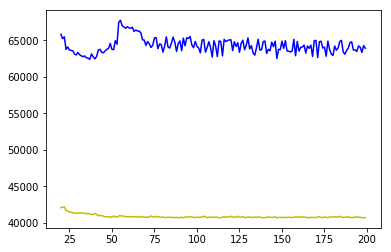

In [63]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',x_list,valid_mse,'b')
plt.show()

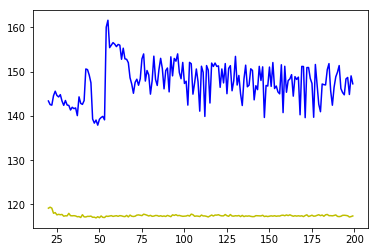

In [62]:
plt.plot(x_list,test_mae,'y',x_list,valid_mae,'b')
plt.show()

In [30]:

import xgboost as xgb

dtr = xgb.XGBRegressor(max_depth=8, learning_rate=0.1)


# train_x,test_x,train_y,test_y
dtr.fit(train_x[features],train_y)

y_pred = dtr.predict(test_x[features])
vlid_pred = dtr.predict(valid_x[features])

print('The MAE of prediction train_data is:', mean_absolute_error(test_y, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
#print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))

print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))

ValueError: Found input variables with inconsistent numbers of samples: [71541, 35771]

In [31]:
print('The MAE of prediction train_data is:', mean_absolute_error(test_y, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
#print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))

print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))

The MAE of prediction train_data is: 85.7944480783
The MAE of prediction valid_data is: 85.1375072346
The MSE of prediction valid_data is: 23907.0302866


In [16]:
dtr = xgb.XGBRegressor(max_depth=8, learning_rate=0.1)
所有特征
The MAE of prediction train_data is: 85.0395749341
The MAE of prediction valid_data is: 85.0483190648
The MSE of prediction valid_data is: 23211.1046788
max_depth=9
The MAE of prediction train_data is: 79.2312313776
The MAE of prediction valid_data is: 84.0364825932
The MSE of prediction valid_data is: 22906.597829
max_depth=10
The MAE of prediction train_data is: 74.7287435372
The MAE of prediction valid_data is: 85.8226865694
The MSE of prediction valid_data is: 23641.0085073

The MAE of prediction train_data is: 74.7287435372
The MAE of prediction valid_data is: 85.8226865694
The MSE of prediction valid_data is: 23641.0085073


In [ ]:
dtr = xgb.XGBRegressor(max_depth=8, learning_rate=0.1)

100
The MAE of prediction train_data is: 84.8834261761
The MAE of prediction valid_data is: 87.1222425463
The MSE of prediction valid_data is: 23468.1188846
120
The MAE of prediction train_data is: 84.9453742738
The MAE of prediction valid_data is: 90.8959669376
The MSE of prediction valid_data is: 24453.9947591
80
The MAE of prediction train_data is: 85.1988766365
The MAE of prediction valid_data is: 85.5486905383
The MSE of prediction valid_data is: 23312.3482064
70    
The MAE of prediction train_data is: 85.4171723916
The MAE of prediction valid_data is: 85.4214605148
The MSE of prediction valid_data is: 23688.5333861